Assignment 4

## GitHub User Name: aton-physics

## Email: andrew_ton@brown.edu


## Problem 1
To convert the Schrodinger equation from second to first order, we trade the second order equation for two first order equations, given below.

$\frac{d\psi}{dx} = \phi$

$\frac{d\phi}{dx} = \frac{2m}{\hbar^2}[V(x) - E]\psi$

We will solve this using the shooting method with a root finding algorithm to find the ground state energy and the next nine excited states.


We use the potential $V(x) = V_o\frac{x^2}{a^2}$ where $V_o = 50 eV, a = 10^{-11} m$

I introduce the dimensionless parameter $\xi = mV_o/(\hbar^2a^2)$

So the Schrodinger Equation may be expressed as $\psi'' = 2\xi(x^2 - \frac{a^2}{V_o}E)\psi$

Giving $\frac{d\psi}{dx} = \phi$

$\frac{d\phi}{dx} = 2\xi[V(x) - \frac{a^2}{V_o}E]\psi$

In [48]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import rootfinder as rtf
import matplotlib.pyplot as plt
from scipy.linalg import eigh

In [1]:
class QM(object):
    def __init__(self,E, npoints, x_start, x_end = 0, u0 = 0.0, v0 = 0.01):
        self.E = E
        self.npoints = npoints
        self.uv0 = np.array([u0, v0]) # NumPy array with initial position and velocity
       
        # always want to start at furthest point and go to zero
        self.xarray = np.linspace(x_start, x_end, npoints, endpoint = True) # include final timepoint

    def scipy_trajectory(self):
        """calculate trajectory using SciPy ode integrator"""
        self.uv = odeint(self.sch, self.uv0, self.xarray)
        self.uv_end = self.uv[-1]


    def sch(self, uv, x):
    
        """right hand side of the differential equation"""
        u = uv[1]
        #v = 2*(self.Potential(x) - self.E)*uv[0]
        a = 1.0e-11
        V0 = 50
        m = 9.1094e-31     # Mass of electron
        hbar = 1.0546e-34  # Planck's constant over 2*pi
        xi = m*V0/hbar**2/a**2
        xi=1
        v = 2*xi*(self.Potential(x) - a**2/V0*self.E)*uv[0]
        #v = (2*m/hbar**2)*(self.Potential(x)-self.E)*uv[0]
        return np.ravel(np.array([u, v]))

    def Potential(self, x):
        V0 = 50
        a = 1.0e-11
        #for next problem just add constant * x^4 right
        return V0*x*x/a/a

In [64]:
# the matching function
def match(En):
    #a = 1.0e-11
    p_up = QM(E = En, npoints = 1000, x_start = -10)
    p_down = QM(E = En, npoints = 1000, x_start = 10)
    p_up.scipy_trajectory()
    p_down.scipy_trajectory()
    #print (p_down.uv_end[0],p_up.uv_end[1])
    return p_down.uv_end[0]*p_up.uv_end[1] - p_down.uv_end[1]*p_up.uv_end[0]

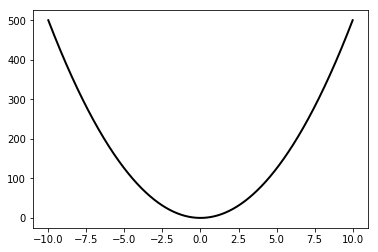

In [80]:
#a = 1.0e-11
#E1 =  -10 # start Energy search at the well depth
#dE = 0.01
#npoints = 1000
a = 1.0e-11
V0=50
E1 = 100
dE = 0.01
npoints = 1000

E_SM = []

fig = plt.figure()
ax = fig.add_subplot(111)

# Cut off after we have found a few states
while (E1 < 200):
    #print(match(E1))
    if match(E1)*match(E1 + dE) < 0 :  # bracket E
        # find the energy
        E = rtf.bisect(match, E1, E1+dE, 1e-12)
        print('Energy found: %.5f'%(E))
        E_SM.append(E)
        
        dx = 16*a/npoints
        # for plotting, must ensure overlap of left and right solutions 
        p_up = QM(E, npoints = npoints+4, x_start = -10, x_end = 0+4*dx)
        p_down = QM(E, npoints = npoints-4, x_start = 10, x_end = 0+4*dx)
        
        p_up.scipy_trajectory()
        p_down.scipy_trajectory()
        
        # scale factor
        scale = p_up.uv_end[0]/p_down.uv_end[0]
        
        # full solution, combine up and down solutions
        psi_x = np.concatenate((p_up.uv[:-1,0], scale*p_down.uv[::-1,0]))
        xa = np.linspace(-10,10, 2*npoints-1, endpoint = True)
        
        # plot the scaled solution (not normalized), scale maximum to 1 for plotting purposes
        ax.plot(xa, psi_x/max(psi_x), lw = 2, label = "E = {:.3f}".format(E))
    #else : 
        #print("No bracket, increasing energy to", E1+dE)
    E1 += dE

# plot the potential
ax.plot(xa, np.vectorize(p_up.Potential)(xa)/10., color = 'k', lw =2)
#ax.set_xlim([-8, 8])
#ax.set_xlabel('x', fontsize = 14)
#ax.set_ylabel('$\psi$ (unnormalized)', fontsize = 14)
#ax.legend(loc = 4, fontsize =10,numpoints = 1 )
plt.show()

part b) Add a quartic term $V(x) = V_ox^2/a^2 + V_o'x^4/a^4$ where $V_o' = 0.1V_o = 5 eV$

Plot level number vs energy for both the harmonic and anharmonic oscillator on the same graph. How does energy vary with level number for each case?

part c) Calculate the wavefunctions of the anharmonic oscillator for the three lowest energy states and plot them all on the same axes as a function of x from -5a to 5a. Don't normalize - just scale.

## Problem 2
a) Use the Jacobi method, compute electric potential between infinitely long concentric square cylinders. Let cylinders have sides 5.0 and 25.0. Assume inner conductor is held at V = 1, outer at V = 0. Use grid spacing of 1. Make a contour plot of the potential and some 1-D slices across rows of the grid.


b) Compute electric potential and field for pt charge at center of a parallel plate capacitor in 2d. Make a contour plot of potential and field. Study how equipotential contours are affected by proximity of the charge to one of the capacitor plates.